# LeNet-5 Classification: Instant Recognition with Caffe


### 1. Setup

* First, set up Python, `numpy`, and `matplotlib`.
* Load `caffe`.

In [29]:
# set up Python environment: numpy for numerical routines, and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

# The caffe module needs to be on the Python path;
#  we'll add it here explicitly.
import sys
caffe_root = 'C:/Caffe/caffe-master/'  # this file should be run from {caffe_root}/examples (otherwise change this line)
sys.path.insert(0, caffe_root + 'Build/x64/Release/pycaffe')

import caffe
# If you get "No module named _caffe", either you have not built pycaffe or you have the wrong path.
import time

### 2. Load net and set up input preprocessing

* Set Caffe to CPU mode and load the net from disk.

In [30]:
model_def = 'C:\Users\User\Desktop\LeNet_5\Model\lenet_deploy.prototxt'
model_weights = 'C:\Users\User\Desktop\LeNet_5\Model\lenet_iter_10000.caffemodel'
#model_weights = 'C:\Users\User\Desktop\LeNet_1\Model\quantized_lenet_iter_10000.caffemodel'

net = caffe.Net(model_def,      # defines the structure of the model
                model_weights,  # contains the trained weights
                caffe.TEST)     # use test mode (e.g., don't perform dropout)

# create transformer for the input called 'data'
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

# load MNIST labels
import os
labels_file = 'C:\Users\User\Desktop\LeNet_5\Dataset\synset_words.txt'
if not os.path.exists(labels_file):
    !../data/ilsvrc12/get_ilsvrc_aux.sh
    
labels = np.loadtxt(labels_file, str, delimiter='\t')

### 3. CPU classification - LeNet 5

In [ ]:
caffe.set_mode_cpu() # set mode to CPU

* Run classification for one image using CPU

Inference Time: 0.00200009346008 s
probabilities and labels: [(0.9996482, '2 [2]'), (0.0002189926, '1 [1]'), (0.0001296008, '7 [7]')]


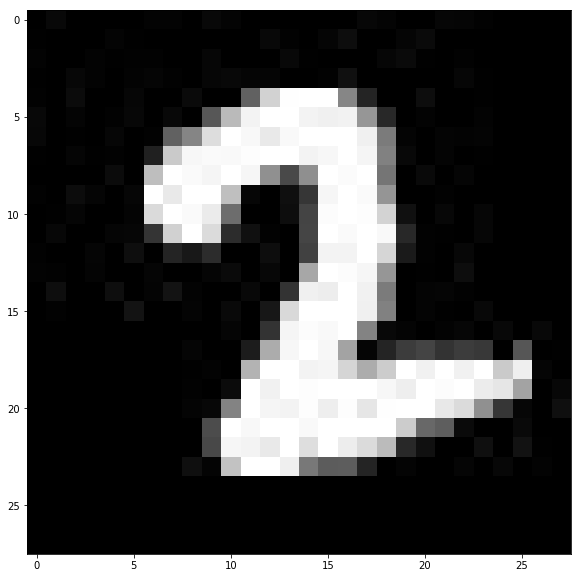

In [31]:
# transform it and copy it into the net
image = caffe.io.load_image('C:/Users/User/Desktop/LeNet_5/Sample_Image/two.png')
image = np.mean(image, axis=2)
net.blobs['data'].data[...] = transformer.preprocess('data', image)

# perform classification
start_time = time.time()    # starting time for inference
net.forward()
diff = time.time() - start_time    # inference time for one image

# obtain the output probabilities
output_prob = net.blobs['prob'].data[0]

# sort top three predictions from softmax output
top_inds = output_prob.argsort()[::-1][:3]

plt.imshow(image)
print 'Inference Time: ' + str(diff) + ' s'

print 'probabilities and labels:', zip(output_prob[top_inds], labels[top_inds])

* Run classification for test images using CPU

In [39]:
# Import libraries
import glob

# Initialization
num=0
dif=0
total_time=0
correct=0

# Program starting time
overall_start = time.time()

# Load images and perform classification
for i in range (10):
    print 'Current test image: ' + str(i) + '\n'
    for image_path in glob.glob('C:/Users/User/Desktop/LeNet_5/Test_Dataset/'+str(i)+'/*.jpg'):
        print(image_path)
        image = caffe.io.load_image(image_path)
        image = np.mean(image, axis=2)
        net.blobs['data'].data[...] = transformer.preprocess('data', image)
        num = num + 1
        
# perform classification
        start_time = time.time()    # starting time for inference
        net.forward()
        diff = time.time() - start_time    # inference time for one image
        total_time += diff    # cumulative inference time

# obtain the output probabilities
        output_prob = net.blobs['prob'].data[0]

# sort top three predictions from softmax output
        top_inds = output_prob.argsort()[::-1][:3]

# display inference time, probabilities, predicted labels
        print 'Inference Time: ' + str(diff) + ' s'
        print 'Probabilities and labels:', zip(output_prob[top_inds], labels[top_inds])
        print
        
# Current number of correct classified image
        if (i==top_inds[0]):
            correct = correct + 1

accuracy = correct*100.000/num            
print
print 'Number of Images: ',num
print 'Correct Predicted: ',correct
print 'Wrong Predicted: ',num-correct
print
print 'Total Inference Time: ',total_time, 's'
print 'Average Inference Time: ',total_time/num, 's'
print 'Frames per seconds:', num/total_time, 'fps'
print
print 'Final Top 1 Accuracy: ',accuracy,'%'
print 'Total Time: ',time.time()-overall_start, 's'

 Current test image: 0

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\10.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999964, '0 [0]'), (3.383224e-07, '2 [2]'), (3.1842166e-08, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\1001.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99997747, '0 [0]'), (2.0000994e-05, '6 [6]'), (1.5475091e-06, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\1009.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99999225, '0 [0]'), (6.205318e-06, '2 [2]'), (1.4532977e-06, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\101.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999926, '0 [0]'), (7.2090907e-06, '6 [6]'), (8.5567535e-08, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\1034.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99996924, '0 [0]'), (1.7817922e-05, '2 [2]'), (8.770777e-06, '9 [9]')]

C:/Users/User/Desktop/Le

Inference Time: 0.0 s
Probabilities and labels: [(0.9968407, '0 [0]'), (0.0028853274, '6 [6]'), (0.0001725602, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\1757.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999607, '0 [0]'), (1.233833e-06, '7 [7]'), (1.1071849e-06, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\1762.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9998368, '0 [0]'), (0.00014036632, '5 [5]'), (9.633614e-06, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\1764.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99998426, '0 [0]'), (9.1895545e-06, '2 [2]'), (6.253693e-06, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\1768.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999689, '0 [0]'), (2.695114e-05, '6 [6]'), (3.1880963e-06, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\1775.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels

Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.999998, '0 [0]'), (1.9739925e-06, '6 [6]'), (4.8143065e-08, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\2527.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99994504, '0 [0]'), (4.994918e-05, '6 [6]'), (4.350249e-06, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\2531.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.999998, '0 [0]'), (1.3610492e-06, '6 [6]'), (5.4153566e-07, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\2536.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99999964, '0 [0]'), (1.4343365e-07, '2 [2]'), (1.2837792e-07, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\2557.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99999845, '0 [0]'), (1.0299416e-06, '2 [2]'), (4.0257387e-07, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\2568.jpg
Inference Time: 0.000999927520752 s
Probabiliti

Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999964, '0 [0]'), (3.777179e-07, '2 [2]'), (3.66599e-08, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\3219.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9995085, '0 [0]'), (0.0004571673, '6 [6]'), (2.233278e-05, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\3226.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999964, '0 [0]'), (3.6169084e-07, '6 [6]'), (1.8682163e-08, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\324.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9756665, '0 [0]'), (0.010597029, '8 [8]'), (0.007136025, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\3242.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99996996, '0 [0]'), (1.6178468e-05, '2 [2]'), (1.1839558e-05, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\3243.jpg
Inference Time: 0.00200009346008 s
Probabilities a

Inference Time: 0.0 s
Probabilities and labels: [(0.9999989, '0 [0]'), (7.560375e-07, '6 [6]'), (3.1804527e-07, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\3864.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99998045, '0 [0]'), (1.25795e-05, '2 [2]'), (5.8185133e-06, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\3867.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999006, '0 [0]'), (7.117638e-05, '1 [1]'), (1.5268843e-05, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\3870.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999893, '0 [0]'), (7.809518e-06, '6 [6]'), (2.2679403e-06, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\3883.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999964, '0 [0]'), (2.221745e-07, '6 [6]'), (7.011496e-08, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\3895.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [

Inference Time: 0.0 s
Probabilities and labels: [(0.9999536, '0 [0]'), (4.572941e-05, '9 [9]'), (4.997853e-07, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\459.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999889, '0 [0]'), (7.196281e-06, '6 [6]'), (2.5601003e-06, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\4604.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9998697, '0 [0]'), (0.00012738498, '6 [6]'), (8.2784413e-07, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\4611.jpg
Inference Time: 0.00300002098083 s
Probabilities and labels: [(1.0, '0 [0]'), (3.5163218e-08, '6 [6]'), (1.0961962e-08, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\4614.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99986625, '0 [0]'), (0.00010578724, '5 [5]'), (2.7895172e-05, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\4617.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99

Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999162, '0 [0]'), (8.106831e-05, '6 [6]'), (2.5523257e-06, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\5257.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99996996, '0 [0]'), (2.587211e-05, '6 [6]'), (3.3485514e-06, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\5259.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99996126, '0 [0]'), (3.8413506e-05, '6 [6]'), (3.1798902e-07, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\5270.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999938, '0 [0]'), (3.7557545e-06, '8 [8]'), (1.7226184e-06, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\5280.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999995, '0 [0]'), (3.883367e-07, '2 [2]'), (1.6034588e-07, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\5290.jpg
Inference Time: 0.000999927520752 s
Probabil

Probabilities and labels: [(0.99985945, '0 [0]'), (4.9349568e-05, '7 [7]'), (4.6155823e-05, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\5890.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999486, '0 [0]'), (2.2990504e-05, '2 [2]'), (1.3019214e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\5899.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999285, '0 [0]'), (5.162548e-06, '6 [6]'), (1.9316085e-06, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\5918.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999106, '0 [0]'), (5.5068413e-06, '2 [2]'), (2.4467638e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\592.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999964, '0 [0]'), (1.4340343e-07, '2 [2]'), (9.861182e-08, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\5929.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999976, '0

Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99999976, '0 [0]'), (1.6779141e-07, '6 [6]'), (3.644837e-08, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\6567.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9998957, '0 [0]'), (9.766678e-05, '6 [6]'), (2.1980518e-06, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\6580.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999607, '0 [0]'), (3.0389263e-06, '2 [2]'), (5.077083e-07, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\6583.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999785, '0 [0]'), (1.4391139e-06, '5 [5]'), (4.217101e-07, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\6588.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999889, '0 [0]'), (6.2174704e-06, '2 [2]'), (4.8631673e-06, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\6590.jpg
Inference Time: 0.000999927520752 s
Probabil

Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999404, '0 [0]'), (3.6038098e-06, '2 [2]'), (2.3658852e-06, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\721.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.999796, '0 [0]'), (0.000119795084, '9 [9]'), (5.3322292e-05, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\7216.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.8658109, '0 [0]'), (0.109471664, '6 [6]'), (0.010910296, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\7221.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9999912, '0 [0]'), (7.891151e-06, '2 [2]'), (5.0423216e-07, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\7225.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99998033, '0 [0]'), (1.751127e-05, '6 [6]'), (1.6889873e-06, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\723.jpg
Inference Time: 0.00300002098083 s
Probabilities an

Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999912, '0 [0]'), (8.152995e-06, '6 [6]'), (4.076373e-07, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\7838.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9994808, '0 [0]'), (0.00051457394, '6 [6]'), (2.2154788e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\7846.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999714, '0 [0]'), (1.586355e-06, '8 [8]'), (6.409784e-07, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\7855.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99999964, '0 [0]'), (2.2938148e-07, '2 [2]'), (8.0237236e-08, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\7866.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999813, '0 [0]'), (9.610934e-06, '6 [6]'), (5.7360076e-06, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\7868.jpg
Inference Time: 0.000999927520752 s
Probabilities 

Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999877, '0 [0]'), (8.8135175e-06, '6 [6]'), (2.5201064e-06, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\8496.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99999726, '0 [0]'), (2.6816008e-06, '9 [9]'), (6.2664725e-08, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\8501.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9999944, '0 [0]'), (5.2523174e-06, '6 [6]'), (2.6471446e-07, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\851.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99999547, '0 [0]'), (3.959791e-06, '6 [6]'), (5.8983017e-07, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\8513.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999654, '0 [0]'), (3.3422084e-06, '6 [6]'), (1.160156e-07, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\8514.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99999917, '0 [0]')

Inference Time: 0.00999999046326 s
Probabilities and labels: [(1.0, '0 [0]'), (4.4815e-08, '6 [6]'), (1.5456633e-08, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\9221.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99999475, '0 [0]'), (3.5247174e-06, '2 [2]'), (1.1945847e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\9223.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.999995, '0 [0]'), (3.8184817e-06, '6 [6]'), (6.819275e-07, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\9230.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999999, '0 [0]'), (1.7184996e-07, '9 [9]'), (3.4565804e-08, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\9236.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99999976, '0 [0]'), (2.5974018e-07, '2 [2]'), (2.1957534e-08, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\9239.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.999


C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\9865.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99999154, '0 [0]'), (4.9234113e-06, '8 [8]'), (2.1543076e-06, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\9879.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9697197, '0 [0]'), (0.01085096, '2 [2]'), (0.009948892, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\9885.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999976, '0 [0]'), (2.0670611e-06, '6 [6]'), (3.5115903e-07, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\9897.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99995947, '0 [0]'), (3.721017e-05, '2 [2]'), (2.954441e-06, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\9902.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9998727, '0 [0]'), (6.787682e-05, '8 [8]'), (4.3111773e-05, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/0\9911.jpg
Inferen

Inference Time: 0.0 s
Probabilities and labels: [(0.9999423, '1 [1]'), (3.4882825e-05, '7 [7]'), (1.760239e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\1527.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.7599935, '1 [1]'), (0.21231475, '5 [5]'), (0.024049478, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\1528.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99998, '1 [1]'), (6.2421186e-06, '8 [8]'), (6.0222187e-06, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\154.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9998233, '1 [1]'), (8.024256e-05, '4 [4]'), (5.6744484e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\1548.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99967027, '1 [1]'), (0.00017175164, '7 [7]'), (7.3135125e-05, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\1555.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99

Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9990741, '1 [1]'), (0.00028695795, '9 [9]'), (0.00020525158, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\2136.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99906963, '1 [1]'), (0.00089472905, '4 [4]'), (2.167487e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\2137.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9998419, '1 [1]'), (8.840958e-05, '7 [7]'), (3.2925218e-05, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\2154.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999703, '1 [1]'), (2.207153e-05, '7 [7]'), (3.891612e-06, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\2164.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99985933, '1 [1]'), (8.005696e-05, '4 [4]'), (4.393232e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\2166.jpg
Inference Time: 0.0019998550415 s
Probabilities a


C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\2734.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99941695, '1 [1]'), (0.00027241293, '8 [8]'), (0.00025697506, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\2746.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999156, '1 [1]'), (6.0199734e-05, '4 [4]'), (2.0958048e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\2753.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9927539, '1 [1]'), (0.0065573454, '8 [8]'), (0.0005400748, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\2757.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99997056, '1 [1]'), (2.3897883e-05, '4 [4]'), (1.9310112e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\276.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99998474, '1 [1]'), (9.449312e-06, '7 [7]'), (4.184997e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\

Inference Time: 0.0 s
Probabilities and labels: [(0.9999403, '1 [1]'), (1.9364103e-05, '8 [8]'), (1.6741813e-05, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\3255.jpg
Inference Time: 0.00799989700317 s
Probabilities and labels: [(0.99987674, '1 [1]'), (7.371032e-05, '7 [7]'), (3.0905245e-05, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\3259.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9985656, '1 [1]'), (0.000544061, '8 [8]'), (0.00040958167, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\3264.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999521, '1 [1]'), (3.0249905e-05, '7 [7]'), (1.4569938e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\3268.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.999912, '1 [1]'), (3.907426e-05, '8 [8]'), (2.7586359e-05, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\3272.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.

Inference Time: 0.00999999046326 s
Probabilities and labels: [(0.9998574, '1 [1]'), (7.8031175e-05, '4 [4]'), (3.0021562e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\3851.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99831796, '1 [1]'), (0.00045631608, '7 [7]'), (0.00041597508, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\3852.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9982994, '1 [1]'), (0.0012819829, '7 [7]'), (0.0003344252, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\3858.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9996381, '1 [1]'), (0.00019561008, '7 [7]'), (0.00012418481, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\3866.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9998783, '1 [1]'), (9.157207e-05, '4 [4]'), (2.6570397e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\388.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: 

Probabilities and labels: [(0.9995838, '1 [1]'), (0.00019087552, '7 [7]'), (7.341026e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\4337.jpg
Inference Time: 0.00300002098083 s
Probabilities and labels: [(0.9999559, '1 [1]'), (2.545306e-05, '4 [4]'), (1.1891127e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\4349.jpg
Inference Time: 0.00299978256226 s
Probabilities and labels: [(0.9981925, '1 [1]'), (0.0017664224, '4 [4]'), (1.7385099e-05, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\4386.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999608, '1 [1]'), (1.6907907e-05, '7 [7]'), (1.534408e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\4409.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9998944, '1 [1]'), (4.3606226e-05, '2 [2]'), (3.0626263e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\4428.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9996941, '1 [1]')

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\4932.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9998933, '1 [1]'), (4.436762e-05, '4 [4]'), (3.662838e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\4949.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9999323, '1 [1]'), (5.885119e-05, '4 [4]'), (4.117844e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\4951.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99404836, '1 [1]'), (0.0029125747, '7 [7]'), (0.0027672083, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\4953.jpg
Inference Time: 0.00999999046326 s
Probabilities and labels: [(0.9999454, '1 [1]'), (2.4109944e-05, '4 [4]'), (1.867473e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\4972.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99948704, '1 [1]'), (0.00035112925, '7 [7]'), (0.00014589653, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\4977.jpg
Inference Time: 0.000999927520752 

Inference Time: 0.00999999046326 s
Probabilities and labels: [(0.9999703, '1 [1]'), (9.519654e-06, '8 [8]'), (9.484276e-06, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\5553.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99998546, '1 [1]'), (1.0925968e-05, '4 [4]'), (2.1076178e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\5566.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99996746, '1 [1]'), (2.3591521e-05, '7 [7]'), (5.8353476e-06, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\5588.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999591, '1 [1]'), (1.8593613e-05, '8 [8]'), (1.5495165e-05, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\5590.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99991584, '1 [1]'), (4.8600843e-05, '4 [4]'), (1.2918201e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\5594.jpg
Inference Time: 0.0019998550415 s
Probabilities and label


C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\6224.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9998704, '1 [1]'), (0.00012117588, '7 [7]'), (7.0414803e-06, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\6231.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99967206, '1 [1]'), (0.00030083957, '7 [7]'), (1.6690843e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\6232.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99969995, '1 [1]'), (0.00028238262, '7 [7]'), (1.3707968e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\6233.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.999902, '1 [1]'), (5.540519e-05, '7 [7]'), (2.99222e-05, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\6239.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99883133, '1 [1]'), (0.0011416719, '7 [7]'), (1.8584355e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\6254.jpg
Infer

Inference Time: 0.00999999046326 s
Probabilities and labels: [(0.9999653, '1 [1]'), (2.0296953e-05, '7 [7]'), (9.070601e-06, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\6883.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.97971237, '1 [1]'), (0.015218406, '2 [2]'), (0.004209332, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\6891.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9998909, '1 [1]'), (7.0699025e-05, '4 [4]'), (2.2291246e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\6901.jpg
Inference Time: 0.00300002098083 s
Probabilities and labels: [(0.9999161, '1 [1]'), (6.736835e-05, '4 [4]'), (1.0432836e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\6902.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.999899, '1 [1]'), (3.972914e-05, '4 [4]'), (3.8711343e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\6913.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.

Inference Time: 0.0 s
Probabilities and labels: [(0.9982765, '1 [1]'), (0.00084717287, '7 [7]'), (0.0005383343, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\7507.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99989486, '1 [1]'), (6.98801e-05, '4 [4]'), (2.2635097e-05, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\7517.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999349, '1 [1]'), (4.3603002e-05, '8 [8]'), (1.0384432e-05, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\7527.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99997985, '1 [1]'), (1.1366977e-05, '2 [2]'), (3.559159e-06, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\754.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9998901, '1 [1]'), (8.748793e-05, '7 [7]'), (1.1604796e-05, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\755.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99963653, '1

Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999143, '1 [1]'), (3.0980358e-05, '8 [8]'), (2.2789889e-05, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\8045.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999095, '1 [1]'), (4.6186575e-05, '2 [2]'), (2.2985549e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\8048.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999733, '1 [1]'), (1.7152563e-05, '8 [8]'), (5.148405e-06, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\8058.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99982303, '1 [1]'), (8.222013e-05, '8 [8]'), (7.240721e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\8068.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9996921, '1 [1]'), (0.000267848, '7 [7]'), (2.0621155e-05, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\8078.jpg
Inference Time: 0.0019998550415 s
Probabilitie

Inference Time: 0.0 s
Probabilities and labels: [(0.99959415, '1 [1]'), (0.00037073743, '7 [7]'), (1.5702255e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\8586.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9999664, '1 [1]'), (2.846606e-05, '7 [7]'), (3.608638e-06, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\8600.jpg
Inference Time: 0.00999999046326 s
Probabilities and labels: [(0.9999455, '1 [1]'), (3.1700754e-05, '7 [7]'), (1.0092572e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\8604.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9999461, '1 [1]'), (2.855322e-05, '7 [7]'), (1.120405e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\8633.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99943143, '1 [1]'), (0.0005039216, '7 [7]'), (5.706717e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\8636.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9999802, '1 [1]'), (8.250685e-06, '8 [8]'), (7.84

Inference Time: 0.00399994850159 s
Probabilities and labels: [(0.9999043, '1 [1]'), (8.862868e-05, '7 [7]'), (4.035778e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\9155.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99996316, '1 [1]'), (1.5882668e-05, '8 [8]'), (1.02006825e-05, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\9171.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99997294, '1 [1]'), (1.2176552e-05, '7 [7]'), (8.580398e-06, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\918.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9995685, '1 [1]'), (0.00024118598, '4 [4]'), (8.4258834e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\9180.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999275, '1 [1]'), (3.4329067e-05, '8 [8]'), (3.0069285e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\9190.jpg
Inference Time: 0.000999927520752 s
Probabili

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\9705.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99998, '1 [1]'), (1.173717e-05, '4 [4]'), (4.2458246e-06, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\9715.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99983776, '1 [1]'), (0.00012156859, '4 [4]'), (3.290537e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\9725.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99961215, '1 [1]'), (0.00034933139, '4 [4]'), (2.6591864e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\9737.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9996377, '1 [1]'), (0.00020601333, '7 [7]'), (0.00014389155, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\9760.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9991448, '1 [1]'), (0.00057062967, '7 [7]'), (0.0001877374, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/1\9

Inference Time: 0.0 s
Probabilities and labels: [(0.9999939, '2 [2]'), (4.312508e-06, '7 [7]'), (1.3141135e-06, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\1337.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9981396, '2 [2]'), (0.0010893494, '6 [6]'), (0.00048552465, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\1341.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(1.0, '2 [2]'), (2.1601128e-08, '1 [1]'), (1.07528715e-08, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\1345.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99999833, '2 [2]'), (8.8733515e-07, '7 [7]'), (7.3340607e-07, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\1348.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999243, '2 [2]'), (6.488166e-05, '0 [0]'), (9.233479e-06, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\1349.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.992

Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99591535, '2 [2]'), (0.0038810875, '0 [0]'), (0.00015871997, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\199.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99946266, '2 [2]'), (0.0005168479, '8 [8]'), (1.37710595e-05, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\1991.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999981, '2 [2]'), (1.9569247e-06, '7 [7]'), (4.6094644e-09, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\2044.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99695075, '2 [2]'), (0.0013867186, '3 [3]'), (0.000906534, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\2055.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99989784, '2 [2]'), (6.687551e-05, '7 [7]'), (2.1484115e-05, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\2058.jpg
Inference Time: 0.00100016593933 s
Probabiliti

Inference Time: 0.00999999046326 s
Probabilities and labels: [(0.9998902, '2 [2]'), (0.00010381063, '7 [7]'), (5.6118683e-06, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\2635.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.999328, '2 [2]'), (0.00035884726, '3 [3]'), (0.00031272913, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\2652.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99977297, '2 [2]'), (0.0001897981, '7 [7]'), (3.5625362e-05, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\2662.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999999, '2 [2]'), (7.399067e-08, '8 [8]'), (5.574572e-08, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\2664.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999988, '2 [2]'), (1.1301348e-06, '3 [3]'), (9.748723e-08, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\2669.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: 

Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999995, '2 [2]'), (2.4405352e-07, '1 [1]'), (1.1599359e-07, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\3318.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999087, '2 [2]'), (6.202047e-05, '8 [8]'), (2.6364227e-05, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\3327.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999995, '2 [2]'), (3.36746e-07, '7 [7]'), (1.4782619e-07, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\3330.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.97214353, '2 [2]'), (0.018961303, '8 [8]'), (0.008706425, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\3337.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.984899, '2 [2]'), (0.01509973, '7 [7]'), (5.127062e-07, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\3339.jpg
Inference Time: 0.000999927520752 s
Probabilities and

Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99997723, '2 [2]'), (1.6942728e-05, '0 [0]'), (3.709216e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\4038.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999905, '2 [2]'), (8.6441804e-07, '3 [3]'), (1.2105833e-07, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\404.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9985656, '2 [2]'), (0.0012876892, '7 [7]'), (0.00010183546, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\4055.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999974, '2 [2]'), (2.4499548e-06, '3 [3]'), (1.11931854e-07, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\4066.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99999976, '2 [2]'), (2.0408328e-07, '1 [1]'), (3.683246e-08, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\4098.jpg
Inference Time: 0.00300002098083 s
Probabil

Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999927, '2 [2]'), (3.0100525e-06, '4 [4]'), (1.4256268e-06, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\4625.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99999774, '2 [2]'), (1.4764623e-06, '3 [3]'), (6.6971927e-07, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\4632.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999435, '2 [2]'), (3.743977e-05, '3 [3]'), (1.6914002e-05, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\4636.jpg
Inference Time: 0.00300002098083 s
Probabilities and labels: [(0.99999964, '2 [2]'), (3.9985846e-07, '1 [1]'), (3.375225e-09, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\4656.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99918216, '2 [2]'), (0.00081698963, '7 [7]'), (8.580348e-07, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\4666.jpg
Inference Time: 0.00200009346008 s
Probabili

Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '2 [2]'), (1.3074447e-10, '3 [3]'), (2.73921e-11, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\5292.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(1.0, '2 [2]'), (4.268902e-08, '7 [7]'), (5.3270766e-10, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\5308.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '2 [2]'), (1.7966055e-08, '3 [3]'), (1.979166e-09, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\5338.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99999666, '2 [2]'), (1.1346963e-06, '1 [1]'), (1.0826398e-06, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\5340.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(1.0, '2 [2]'), (2.5773722e-10, '3 [3]'), (4.5171072e-11, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\536.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.999971

Probabilities and labels: [(1.0, '2 [2]'), (1.4996692e-08, '7 [7]'), (1.2115563e-08, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\6027.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9990194, '2 [2]'), (0.0007831389, '8 [8]'), (9.929403e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\6035.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99673104, '2 [2]'), (0.0027748814, '0 [0]'), (0.00043098544, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\6036.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(1.0, '2 [2]'), (1.6028395e-08, '3 [3]'), (9.562889e-09, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\6041.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999844, '2 [2]'), (9.692083e-06, '8 [8]'), (5.760063e-06, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\6051.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99997437, '2 [2]'), (2.0504553e-0

Inference Time: 0.00999999046326 s
Probabilities and labels: [(0.9999982, '2 [2]'), (9.722614e-07, '4 [4]'), (2.3049579e-07, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\6614.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99509996, '2 [2]'), (0.004893601, '7 [7]'), (4.795713e-06, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\6616.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999999, '2 [2]'), (1.5250218e-07, '7 [7]'), (7.2957387e-09, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\6635.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9998988, '2 [2]'), (6.754203e-05, '8 [8]'), (3.2352364e-05, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\6645.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9999049, '2 [2]'), (8.1077684e-05, '8 [8]'), (1.3250369e-05, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\6677.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(

Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '2 [2]'), (5.7309855e-08, '3 [3]'), (1.1977382e-08, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\7345.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999652, '2 [2]'), (3.1370317e-05, '1 [1]'), (3.4756158e-06, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\7348.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999931, '2 [2]'), (6.1003334e-06, '7 [7]'), (4.242381e-07, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\7349.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99995065, '2 [2]'), (4.8359936e-05, '1 [1]'), (4.5706165e-07, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\7359.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99998677, '2 [2]'), (1.3228071e-05, '1 [1]'), (3.6735297e-08, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\7364.jpg
Inference Time: 0.000999927520752 s
Probabiliti

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\8059.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.97728443, '2 [2]'), (0.022599038, '1 [1]'), (0.000115423805, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\8069.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9952892, '2 [2]'), (0.004705473, '1 [1]'), (4.048998e-06, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\8079.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99960214, '2 [2]'), (0.00039781808, '1 [1]'), (1.2418052e-07, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\8091.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9341585, '2 [2]'), (0.04944918, '8 [8]'), (0.014799765, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\8094.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.50846547, '2 [2]'), (0.4119635, '8 [8]'), (0.07913203, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\8102.jpg
Inference Time: 0.0

Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '2 [2]'), (1.0032508e-09, '3 [3]'), (1.2916582e-10, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\8712.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '2 [2]'), (5.2655718e-08, '7 [7]'), (1.0040553e-08, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\8714.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '2 [2]'), (2.3679159e-09, '1 [1]'), (1.0627956e-09, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\8719.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999999, '2 [2]'), (1.7670868e-07, '1 [1]'), (3.1750158e-09, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\8721.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999999, '2 [2]'), (9.340656e-08, '7 [7]'), (1.5186611e-08, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\873.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [

Inference Time: 0.0 s
Probabilities and labels: [(0.9978496, '2 [2]'), (0.001637597, '0 [0]'), (0.00028051672, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\9417.jpg
Inference Time: 0.00999999046326 s
Probabilities and labels: [(0.9999993, '2 [2]'), (3.9550446e-07, '8 [8]'), (2.1222749e-07, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\9421.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9986198, '2 [2]'), (0.0012583344, '0 [0]'), (6.0784256e-05, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\9442.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999987, '2 [2]'), (1.3646398e-06, '3 [3]'), (1.1728085e-08, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\9446.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99981374, '2 [2]'), (0.000105841726, '7 [7]'), (7.942669e-05, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/2\945.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels:

Inference Time: 0.0 s
Probabilities and labels: [(0.99999654, '3 [3]'), (1.4330585e-06, '8 [8]'), (1.1953709e-06, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\1095.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '3 [3]'), (3.0871565e-08, '5 [5]'), (4.193588e-09, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\1098.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99999154, '3 [3]'), (4.0718655e-06, '9 [9]'), (3.7577129e-06, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\1109.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999995, '3 [3]'), (4.7484e-07, '2 [2]'), (1.4560119e-08, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\1114.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9877687, '3 [3]'), (0.01215055, '8 [8]'), (7.658024e-05, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\112.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.999999

Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999974, '3 [3]'), (2.6140865e-06, '5 [5]'), (1.2405421e-08, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\18.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9530833, '3 [3]'), (0.025094382, '5 [5]'), (0.01973419, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\1803.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(1.0, '3 [3]'), (4.0191832e-08, '5 [5]'), (1.5582607e-09, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\1804.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(1.0, '3 [3]'), (7.996637e-12, '8 [8]'), (1.2933498e-13, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\1828.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99924135, '3 [3]'), (0.00031116078, '2 [2]'), (0.00030291273, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\1832.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [

Inference Time: 0.0 s
Probabilities and labels: [(0.9999999, '3 [3]'), (9.255654e-08, '8 [8]'), (3.8844703e-08, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\2522.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99999976, '3 [3]'), (2.5734016e-07, '5 [5]'), (1.3337237e-08, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\2533.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99940014, '3 [3]'), (0.0003541078, '5 [5]'), (0.00012358892, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\2534.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99302953, '3 [3]'), (0.006969246, '5 [5]'), (8.931244e-07, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\2549.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999999, '3 [3]'), (1.5664541e-07, '8 [8]'), (9.05346e-09, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\2551.jpg
Inference Time: 0.000999927520752 s
Probabilities and label

Inference Time: 0.00999999046326 s
Probabilities and labels: [(0.9991366, '3 [3]'), (0.0008624931, '5 [5]'), (4.3332494e-07, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\3131.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99999857, '3 [3]'), (1.4571178e-06, '5 [5]'), (7.968303e-09, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\3138.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999734, '3 [3]'), (1.3328679e-05, '5 [5]'), (9.06775e-06, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\3146.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.98636717, '3 [3]'), (0.013027485, '5 [5]'), (0.000568284, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\3150.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999964, '3 [3]'), (3.180349e-07, '8 [8]'), (3.2345382e-09, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\3167.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(

Inference Time: 0.00999999046326 s
Probabilities and labels: [(0.99999547, '3 [3]'), (4.2283896e-06, '8 [8]'), (8.1867356e-08, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\3910.jpg
Inference Time: 0.0 s
Probabilities and labels: [(1.0, '3 [3]'), (9.7281766e-11, '9 [9]'), (3.1303234e-11, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\3916.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9999635, '3 [3]'), (3.6289708e-05, '8 [8]'), (2.8428917e-07, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\3943.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9969235, '3 [3]'), (0.003066911, '5 [5]'), (9.12545e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\3944.jpg
Inference Time: 0.0 s
Probabilities and labels: [(1.0, '3 [3]'), (9.6355945e-09, '9 [9]'), (8.365257e-10, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\3947.jpg
Inference Time: 0.0 s
Probabilities and labels: [(1.0, '3 [3]'), (1.8639876e-09, '8 [8]'), (2.1572397e-11, '9 [9]

Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '3 [3]'), (1.631419e-08, '8 [8]'), (5.493569e-09, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\4621.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '3 [3]'), (5.13657e-10, '5 [5]'), (4.315216e-10, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\4630.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99459016, '3 [3]'), (0.0024927123, '5 [5]'), (0.0024696558, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\4635.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9996555, '3 [3]'), (0.00034430812, '5 [5]'), (1.2606019e-07, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\4638.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999999, '3 [3]'), (9.3312e-08, '5 [5]'), (4.76707e-10, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\464.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99

Inference Time: 0.0 s
Probabilities and labels: [(1.0, '3 [3]'), (4.6221485e-10, '9 [9]'), (3.753661e-10, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\531.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999784, '3 [3]'), (1.6367503e-05, '8 [8]'), (4.4698236e-06, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\5328.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '3 [3]'), (2.1661199e-08, '8 [8]'), (1.2055721e-08, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\5329.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(1.0, '3 [3]'), (1.296747e-08, '5 [5]'), (3.2933498e-09, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\5330.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999976, '3 [3]'), (1.4580223e-07, '8 [8]'), (1.2242842e-07, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\5336.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99999976, '3

Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9999844, '3 [3]'), (8.814489e-06, '9 [9]'), (6.76014e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\595.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99999297, '3 [3]'), (5.6761446e-06, '5 [5]'), (7.1507236e-07, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\5955.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.783277, '8 [8]'), (0.20914543, '3 [3]'), (0.007403367, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\5973.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.65246767, '3 [3]'), (0.29473966, '8 [8]'), (0.05227385, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\6009.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.997649, '3 [3]'), (0.0023130877, '9 [9]'), (1.9598014e-05, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\6011.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9870385, 

Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9993618, '3 [3]'), (0.00031307602, '5 [5]'), (0.00019882567, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\6593.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99995863, '3 [3]'), (2.8089027e-05, '7 [7]'), (7.95195e-06, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\6624.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99890304, '3 [3]'), (0.0010911719, '5 [5]'), (2.6489515e-06, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\6636.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999906, '3 [3]'), (8.734354e-06, '8 [8]'), (3.575123e-07, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\6646.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999999, '3 [3]'), (6.5049164e-08, '5 [5]'), (1.35249625e-08, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\6664.jpg
Inference Time: 0.0019998550415 s
Probabilities and

Inference Time: 0.00200009346008 s
Probabilities and labels: [(1.0, '3 [3]'), (3.5251708e-09, '5 [5]'), (1.4000621e-09, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\7222.jpg
Inference Time: 0.00300002098083 s
Probabilities and labels: [(1.0, '3 [3]'), (2.4012986e-10, '9 [9]'), (1.9627258e-10, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\7233.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9996197, '3 [3]'), (0.00034373513, '5 [5]'), (2.5485473e-05, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\7248.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9999449, '3 [3]'), (5.0362687e-05, '5 [5]'), (3.6049905e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\7250.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(1.0, '3 [3]'), (2.084061e-10, '8 [8]'), (1.8706076e-10, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\7252.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0

Inference Time: 0.0 s
Probabilities and labels: [(0.9999994, '3 [3]'), (2.9874698e-07, '8 [8]'), (1.8565868e-07, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\795.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999716, '3 [3]'), (1.2488639e-05, '1 [1]'), (9.626482e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\7956.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '3 [3]'), (4.6757587e-10, '5 [5]'), (4.4140004e-11, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\7968.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(1.0, '3 [3]'), (5.1344645e-10, '9 [9]'), (2.570764e-10, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\7981.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(1.0, '3 [3]'), (1.5556556e-10, '5 [5]'), (1.11548985e-10, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\7983.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(1.0, '3 [3]'),

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\8561.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999964, '3 [3]'), (1.7923617e-07, '5 [5]'), (9.424837e-08, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\8570.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(1.0, '3 [3]'), (1.5096795e-08, '9 [9]'), (6.048023e-09, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\8581.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999999, '3 [3]'), (1.3136959e-07, '8 [8]'), (3.795742e-10, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\8597.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99997556, '3 [3]'), (2.4492088e-05, '8 [8]'), (4.7322892e-08, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\8598.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99999726, '3 [3]'), (2.6197263e-06, '8 [8]'), (7.219726e-08, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\8603.jpg

Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99999964, '3 [3]'), (1.8628904e-07, '8 [8]'), (8.985167e-08, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\9227.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999763, '3 [3]'), (2.181302e-05, '8 [8]'), (1.9035318e-06, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\9229.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '3 [3]'), (2.6739135e-08, '9 [9]'), (1.4610925e-08, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\923.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '3 [3]'), (8.7321356e-10, '8 [8]'), (8.940896e-11, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\9231.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(1.0, '3 [3]'), (2.8939484e-08, '9 [9]'), (6.8822046e-09, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\9235.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(1.

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\9872.jpg
Inference Time: 0.0 s
Probabilities and labels: [(1.0, '3 [3]'), (1.8355662e-08, '5 [5]'), (1.7508096e-10, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\9881.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99998856, '3 [3]'), (1.1018913e-05, '5 [5]'), (2.6692524e-07, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\9882.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999416, '3 [3]'), (5.1442476e-06, '5 [5]'), (5.515033e-07, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\9889.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999857, '3 [3]'), (9.693639e-07, '8 [8]'), (4.7029272e-07, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\9905.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.95395815, '3 [3]'), (0.03832724, '7 [7]'), (0.0047801705, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/3\991.jpg
Inference T

Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9914737, '4 [4]'), (0.0060729994, '9 [9]'), (0.0019407057, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\1453.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9996886, '4 [4]'), (0.0003111178, '9 [9]'), (1.3901798e-07, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\1461.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9999994, '4 [4]'), (5.596903e-07, '7 [7]'), (3.661873e-08, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\1465.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9983693, '4 [4]'), (0.00097607146, '2 [2]'), (0.00026109556, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\1488.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9999634, '4 [4]'), (3.315427e-05, '6 [6]'), (2.8880447e-06, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\1509.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9669179, '

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\2120.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999999, '4 [4]'), (1.564961e-07, '7 [7]'), (9.063257e-09, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\2124.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '4 [4]'), (4.4835517e-08, '2 [2]'), (6.9453967e-09, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\2130.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.91356117, '9 [9]'), (0.08640037, '4 [4]'), (1.7184664e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\2145.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99792385, '4 [4]'), (0.0017765502, '2 [2]'), (0.00028679764, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\2148.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9800976, '4 [4]'), (0.019407403, '9 [9]'), (0.00046099545, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\2165.jpg
Inf

Inference Time: 0.0 s
Probabilities and labels: [(0.9999999, '4 [4]'), (1.7880872e-07, '9 [9]'), (4.1948756e-09, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\2828.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99999285, '4 [4]'), (7.0073047e-06, '9 [9]'), (4.2905196e-08, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\2835.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999776, '4 [4]'), (1.7268596e-05, '7 [7]'), (2.6602513e-06, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\2836.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9168611, '4 [4]'), (0.037891608, '2 [2]'), (0.026808038, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\2847.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99998045, '4 [4]'), (7.4993663e-06, '7 [7]'), (5.1274947e-06, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\287.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: 

Inference Time: 0.0 s
Probabilities and labels: [(0.9999956, '4 [4]'), (4.1579665e-06, '9 [9]'), (1.7286305e-07, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\3497.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9999031, '4 [4]'), (6.620038e-05, '9 [9]'), (1.7856342e-05, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\3500.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999976, '4 [4]'), (2.6442697e-07, '9 [9]'), (1.5896834e-08, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\3517.jpg
Inference Time: 0.00300002098083 s
Probabilities and labels: [(1.0, '4 [4]'), (6.5012546e-09, '2 [2]'), (1.2650654e-09, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\3523.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999995, '4 [4]'), (2.920409e-07, '1 [1]'), (1.0741946e-07, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\3530.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999441, '4 

Probabilities and labels: [(0.99990845, '4 [4]'), (8.4712985e-05, '6 [6]'), (4.2837023e-06, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\4258.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999999, '4 [4]'), (6.175599e-08, '9 [9]'), (8.9554236e-10, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\4265.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9383009, '4 [4]'), (0.02527847, '3 [3]'), (0.021138271, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\4266.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99999225, '4 [4]'), (7.77371e-06, '9 [9]'), (8.658733e-09, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\4268.jpg
Inference Time: 0.00300002098083 s
Probabilities and labels: [(0.9997379, '4 [4]'), (0.00024550254, '5 [5]'), (7.694423e-06, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\4269.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9977976, '4 [4]'), (0.

Probabilities and labels: [(1.0, '4 [4]'), (2.3962498e-08, '9 [9]'), (1.6742245e-08, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\5039.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '4 [4]'), (1.2072766e-09, '9 [9]'), (4.3088913e-10, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\5047.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999999, '4 [4]'), (6.034797e-08, '7 [7]'), (3.0719196e-08, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\5055.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999905, '4 [4]'), (4.1830236e-07, '7 [7]'), (4.006392e-07, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\5063.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999714, '4 [4]'), (2.6953944e-06, '9 [9]'), (8.9791314e-08, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\5068.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.98244184, '4 [4]'), (0.0

Inference Time: 0.0 s
Probabilities and labels: [(0.9992384, '4 [4]'), (0.00058537594, '2 [2]'), (0.00011060622, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\5698.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.998173, '4 [4]'), (0.0011405435, '1 [1]'), (0.00051009015, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\571.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9842763, '4 [4]'), (0.015717188, '9 [9]'), (3.7456855e-06, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\5713.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999994, '4 [4]'), (4.619319e-07, '1 [1]'), (1.877859e-07, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\5720.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99992967, '4 [4]'), (2.375931e-05, '1 [1]'), (1.9169976e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\5725.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999999, '

Inference Time: 0.0 s
Probabilities and labels: [(1.0, '4 [4]'), (5.904533e-08, '9 [9]'), (1.4301723e-09, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\6433.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9999999, '4 [4]'), (6.199781e-08, '2 [2]'), (4.5378556e-08, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\6448.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99999964, '4 [4]'), (2.0265541e-07, '1 [1]'), (1.3586244e-07, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\6460.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99999845, '4 [4]'), (1.0797679e-06, '8 [8]'), (2.961003e-07, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\6474.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999809, '4 [4]'), (1.01114465e-05, '1 [1]'), (3.2324133e-06, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\6475.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(1.0, '4 [4]'), (3.1452332e-

Inference Time: 0.0 s
Probabilities and labels: [(1.0, '4 [4]'), (7.3857533e-09, '9 [9]'), (3.3288612e-09, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\7092.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(1.0, '4 [4]'), (1.3737683e-09, '7 [7]'), (1.1823404e-11, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\7096.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(1.0, '4 [4]'), (9.9684136e-11, '7 [7]'), (1.546413e-11, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\7101.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '4 [4]'), (8.456413e-09, '9 [9]'), (2.9800984e-09, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\7102.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999666, '4 [4]'), (2.3722625e-06, '9 [9]'), (7.483302e-07, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\712.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999957, '4 [4]'),

Inference Time: 0.0 s
Probabilities and labels: [(1.0, '4 [4]'), (2.6243018e-08, '7 [7]'), (8.203086e-09, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\776.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99999976, '4 [4]'), (8.3954575e-08, '5 [5]'), (8.196817e-08, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\7764.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999999, '4 [4]'), (6.7406155e-08, '7 [7]'), (2.6411486e-08, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\7775.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999999, '4 [4]'), (8.546589e-08, '7 [7]'), (9.846641e-11, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\7818.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '4 [4]'), (6.525517e-09, '6 [6]'), (4.647469e-09, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\7833.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(1.0, '4 [4]'

Inference Time: 0.0 s
Probabilities and labels: [(0.99999714, '4 [4]'), (2.8998056e-06, '7 [7]'), (1.6064341e-08, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\8462.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999964, '4 [4]'), (3.8502375e-07, '7 [7]'), (1.6597722e-09, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\8472.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999999, '4 [4]'), (6.46171e-08, '9 [9]'), (5.80766e-08, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\8484.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(1.0, '4 [4]'), (3.381541e-09, '9 [9]'), (1.0341857e-09, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\85.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99999964, '4 [4]'), (1.5683237e-07, '9 [9]'), (6.894635e-08, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\8500.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0

Inference Time: 0.00999999046326 s
Probabilities and labels: [(0.99999976, '4 [4]'), (1.7561982e-07, '1 [1]'), (1.05660135e-07, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\9193.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9999999, '4 [4]'), (1.3341494e-07, '2 [2]'), (1.28951765e-08, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\9203.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9999995, '4 [4]'), (2.2998492e-07, '2 [2]'), (1.1414334e-07, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\9208.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99997497, '4 [4]'), (1.7733482e-05, '1 [1]'), (3.6929675e-06, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\9211.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99985504, '4 [4]'), (0.00014386108, '9 [9]'), (7.914e-07, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\9224.jpg
Inference Time: 0.00100016593933 s
Probabilities and labe

Inference Time: 0.0 s
Probabilities and labels: [(0.9999906, '4 [4]'), (7.84985e-06, '7 [7]'), (5.6717886e-07, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\9928.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9999913, '4 [4]'), (8.560677e-06, '9 [9]'), (6.833946e-08, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\9947.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9999902, '4 [4]'), (5.521556e-06, '6 [6]'), (1.8227809e-06, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\9960.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999976, '4 [4]'), (2.3224237e-07, '9 [9]'), (5.0163802e-08, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\9972.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9999999, '4 [4]'), (1.1956502e-07, '9 [9]'), (1.3053952e-08, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/4\9974.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.999997, '4 

Inference Time: 0.00999999046326 s
Probabilities and labels: [(1.0, '5 [5]'), (2.5010676e-11, '3 [3]'), (7.459872e-12, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\1629.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(1.0, '5 [5]'), (7.998216e-10, '9 [9]'), (7.5308026e-10, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\1635.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999917, '5 [5]'), (7.479375e-07, '3 [3]'), (1.0945996e-07, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\1637.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.8970661, '5 [5]'), (0.10287489, '3 [3]'), (3.3831275e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\1639.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999857, '5 [5]'), (1.4272458e-06, '9 [9]'), (3.0478876e-08, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\1641.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [

Inference Time: 0.00999999046326 s
Probabilities and labels: [(0.99098855, '5 [5]'), (0.008961616, '3 [3]'), (4.8716905e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\23.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99999976, '5 [5]'), (1.1090229e-07, '6 [6]'), (7.579153e-08, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\2322.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999875, '5 [5]'), (7.22467e-06, '9 [9]'), (4.8520933e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\2339.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9704962, '5 [5]'), (0.029302673, '8 [8]'), (0.00011156767, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\2346.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(1.0, '5 [5]'), (3.9166004e-09, '3 [3]'), (9.537129e-10, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\2369.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.8958689,

Inference Time: 0.0 s
Probabilities and labels: [(0.9999577, '5 [5]'), (2.0669719e-05, '8 [8]'), (2.044376e-05, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\3007.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999857, '5 [5]'), (7.2355306e-06, '9 [9]'), (6.9969374e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\3022.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99999464, '5 [5]'), (5.1959714e-06, '9 [9]'), (7.970024e-08, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\3028.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999995, '5 [5]'), (4.856788e-07, '3 [3]'), (3.3849545e-08, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\3053.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(1.0, '5 [5]'), (3.9776484e-09, '3 [3]'), (2.0574094e-10, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\3093.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99

Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99999654, '5 [5]'), (1.8103779e-06, '9 [9]'), (1.3844808e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\3826.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999344, '5 [5]'), (6.390098e-06, '8 [8]'), (8.4644306e-08, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\3837.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999962, '5 [5]'), (2.1151634e-06, '9 [9]'), (1.52095e-06, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\3855.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9998815, '5 [5]'), (0.000108574815, '0 [0]'), (6.2613326e-06, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\3860.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999949, '5 [5]'), (3.0742813e-06, '8 [8]'), (1.4872053e-06, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\3863.jpg
Inference Time: 0.000999927520752 s
Probabil

Inference Time: 0.00999999046326 s
Probabilities and labels: [(0.9999826, '5 [5]'), (1.6306045e-05, '9 [9]'), (1.0229887e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\4529.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9999988, '5 [5]'), (6.2502863e-07, '3 [3]'), (4.092511e-07, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\4548.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9987394, '5 [5]'), (0.00078281417, '1 [1]'), (0.00038039926, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\4569.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99997735, '5 [5]'), (2.164711e-05, '3 [3]'), (7.0242334e-07, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\4577.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999964, '5 [5]'), (2.4273422e-07, '8 [8]'), (1.0390047e-07, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\4583.jpg
Inference Time: 0.00100016593933 s
Probabilities and labe

Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '5 [5]'), (2.8070397e-09, '9 [9]'), (2.955252e-11, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\5374.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999951, '5 [5]'), (3.1583775e-06, '3 [3]'), (1.8451665e-06, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\5389.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999094, '5 [5]'), (8.691108e-06, '3 [3]'), (3.763533e-07, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\5397.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99998415, '5 [5]'), (1.5120656e-05, '3 [3]'), (4.906667e-07, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\540.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999956, '5 [5]'), (3.2370572e-06, '8 [8]'), (9.410649e-07, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\5400.jpg
Inference Time: 0.000999927520752 s
Probabilities 

Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.97117144, '5 [5]'), (0.019902967, '9 [9]'), (0.0088803405, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\6067.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999785, '5 [5]'), (2.0361022e-06, '9 [9]'), (1.01694184e-07, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\6077.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999999, '5 [5]'), (7.166936e-08, '8 [8]'), (6.116829e-09, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\6087.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99991393, '5 [5]'), (8.388035e-05, '8 [8]'), (2.079574e-06, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\6095.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(1.0, '5 [5]'), (1.5837882e-08, '8 [8]'), (1.6232363e-09, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\6120.jpg
Inference Time: 0.0019998550415 s
Probabilities and 

Inference Time: 0.0 s
Probabilities and labels: [(0.9998153, '5 [5]'), (0.00014644468, '8 [8]'), (2.8592727e-05, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\6908.jpg
Inference Time: 0.0 s
Probabilities and labels: [(1.0, '5 [5]'), (6.5668955e-09, '9 [9]'), (2.2046411e-09, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\6909.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9995833, '5 [5]'), (0.0003681391, '8 [8]'), (4.6057034e-05, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\692.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999287, '5 [5]'), (5.28164e-05, '9 [9]'), (8.030581e-06, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\6932.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '5 [5]'), (7.486024e-09, '3 [3]'), (1.4623625e-10, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\694.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999917, '5 [5]'), (8.

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\7542.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99998534, '5 [5]'), (7.5279e-06, '3 [3]'), (6.6243624e-06, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\7559.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999975, '5 [5]'), (2.5075685e-06, '3 [3]'), (2.146038e-08, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\7577.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999654, '5 [5]'), (3.2318073e-06, '3 [3]'), (2.283974e-07, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\7578.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999374, '5 [5]'), (6.2175925e-05, '3 [3]'), (1.8337393e-07, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\7583.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9997017, '5 [5]'), (0.000296375, '3 [3]'), (9.1110877e-07, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\76

Inference Time: 0.00300002098083 s
Probabilities and labels: [(0.9783611, '5 [5]'), (0.02107328, '3 [3]'), (0.00050614466, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\8331.jpg
Inference Time: 0.00300002098083 s
Probabilities and labels: [(0.99999106, '5 [5]'), (5.4751754e-06, '8 [8]'), (3.176834e-06, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\8348.jpg
Inference Time: 0.00300002098083 s
Probabilities and labels: [(0.9999993, '5 [5]'), (6.6822685e-07, '8 [8]'), (4.2391694e-08, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\8366.jpg
Inference Time: 0.00300002098083 s
Probabilities and labels: [(1.0, '5 [5]'), (8.136394e-09, '3 [3]'), (5.37305e-09, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\8386.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(1.0, '5 [5]'), (3.47895e-08, '8 [8]'), (6.6940276e-09, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\8412.jpg
Inference Time: 0.00400018692017 s
Probabilities and labels: [(0.

Inference Time: 0.0019998550415 s
Probabilities and labels: [(1.0, '5 [5]'), (7.6127424e-11, '9 [9]'), (2.1385747e-11, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\9075.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(1.0, '5 [5]'), (1.1723509e-09, '9 [9]'), (1.1152069e-10, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\9085.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999995, '5 [5]'), (2.899186e-07, '9 [9]'), (9.727592e-08, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\9109.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(1.0, '5 [5]'), (8.051631e-11, '8 [8]'), (7.645001e-11, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\9114.jpg
Inference Time: 0.0 s
Probabilities and labels: [(1.0, '5 [5]'), (4.537785e-09, '6 [6]'), (1.9213566e-09, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\9117.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99998856, '5 [5]'), (1.003273e-05, '

Inference Time: 0.00300002098083 s
Probabilities and labels: [(0.99968696, '5 [5]'), (0.00015664264, '6 [6]'), (0.00012481067, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\9841.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99997425, '5 [5]'), (2.3789642e-05, '6 [6]'), (1.061112e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\9853.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999752, '5 [5]'), (2.3503586e-05, '8 [8]'), (8.59704e-07, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\9870.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99998784, '5 [5]'), (9.899614e-06, '6 [6]'), (2.192482e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\9877.jpg
Inference Time: 0.00300002098083 s
Probabilities and labels: [(0.99999964, '5 [5]'), (2.1735056e-07, '8 [8]'), (7.5184644e-08, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/5\9883.jpg
Inference Time: 0.0019998550415 s
Probabilities 

Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999999, '6 [6]'), (6.085424e-08, '4 [4]'), (8.260803e-09, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\1578.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999905, '6 [6]'), (3.7533553e-07, '8 [8]'), (3.6475205e-07, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\1579.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99872464, '6 [6]'), (0.00083101855, '5 [5]'), (0.0004415704, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\1587.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9964071, '6 [6]'), (0.0030215827, '8 [8]'), (0.0005091642, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\1593.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99917823, '6 [6]'), (0.0002469073, '0 [0]'), (0.00019572717, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\1602.jpg
Inference Time: 0.000999927520752 s
Probabili

Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999999, '6 [6]'), (1.17222676e-07, '5 [5]'), (1.8276845e-08, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\2194.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99994755, '6 [6]'), (3.185219e-05, '5 [5]'), (1.30915e-05, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\2199.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9997284, '6 [6]'), (0.00024750878, '5 [5]'), (2.382961e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\22.jpg
Inference Time: 0.00999999046326 s
Probabilities and labels: [(0.9999995, '6 [6]'), (1.9612085e-07, '0 [0]'), (1.1282365e-07, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\2210.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99991035, '6 [6]'), (7.059334e-05, '4 [4]'), (1.3185824e-05, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\2215.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels:

Inference Time: 0.0 s
Probabilities and labels: [(0.99956566, '6 [6]'), (0.00039865143, '5 [5]'), (3.2394248e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\2947.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9999932, '6 [6]'), (6.1693245e-06, '4 [4]'), (4.884218e-07, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\2976.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99348456, '6 [6]'), (0.0064793737, '5 [5]'), (3.4326175e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\2980.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999691, '6 [6]'), (3.0704705e-05, '5 [5]'), (1.0819922e-07, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\2994.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99961096, '6 [6]'), (0.0002822008, '4 [4]'), (4.6844605e-05, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\2995.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.52901644


C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\3564.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9984597, '6 [6]'), (0.0014624891, '8 [8]'), (4.8739337e-05, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\3602.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '6 [6]'), (8.020765e-10, '4 [4]'), (2.2089164e-10, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\3603.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(1.0, '6 [6]'), (7.0850845e-09, '8 [8]'), (2.7259535e-09, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\361.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999999, '6 [6]'), (1.4458678e-07, '5 [5]'), (1.7468752e-08, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\3614.jpg
Inference Time: 0.00300002098083 s
Probabilities and labels: [(0.9999995, '6 [6]'), (4.2640357e-07, '0 [0]'), (4.846105e-09, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\3617.jpg
Infere

Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99994075, '6 [6]'), (5.469355e-05, '5 [5]'), (2.516863e-06, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\4347.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9999994, '6 [6]'), (6.076586e-07, '5 [5]'), (8.4697405e-09, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\4388.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9999951, '6 [6]'), (4.8358556e-06, '5 [5]'), (1.6976031e-08, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\439.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.996994, '6 [6]'), (0.0029234658, '5 [5]'), (7.930518e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\4394.jpg
Inference Time: 0.00300002098083 s
Probabilities and labels: [(0.99999547, '6 [6]'), (4.3454847e-06, '4 [4]'), (8.123986e-08, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\4395.jpg
Inference Time: 0.0019998550415 s
Probabilities and

Inference Time: 0.00999999046326 s
Probabilities and labels: [(0.99999547, '6 [6]'), (4.391419e-06, '0 [0]'), (1.0857481e-07, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\499.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99939764, '6 [6]'), (0.0003251292, '8 [8]'), (0.0002724222, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\50.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999926, '6 [6]'), (6.041733e-06, '5 [5]'), (9.5288357e-07, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\5007.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(1.0, '6 [6]'), (1.5704884e-09, '8 [8]'), (1.5534622e-09, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\5010.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999976, '6 [6]'), (1.5515387e-07, '4 [4]'), (6.241307e-08, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\5012.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999

Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999957, '6 [6]'), (3.3115539e-06, '4 [4]'), (8.825897e-07, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\5693.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999956, '6 [6]'), (3.7586528e-06, '5 [5]'), (2.4040276e-07, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\5694.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999964, '6 [6]'), (1.4091019e-07, '8 [8]'), (9.794244e-08, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\5702.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999666, '6 [6]'), (1.7410684e-06, '5 [5]'), (1.5164175e-06, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\5712.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999919, '6 [6]'), (5.781294e-06, '4 [4]'), (2.093171e-06, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\5715.jpg
Inference Time: 0.000999927520752 s
Probabiliti


C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\6258.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(1.0, '6 [6]'), (1.8109349e-08, '4 [4]'), (1.0174557e-08, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\6261.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '6 [6]'), (5.8596562e-08, '4 [4]'), (2.2870365e-08, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\6283.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999987, '6 [6]'), (8.048397e-07, '4 [4]'), (4.307249e-07, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\6294.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999268, '6 [6]'), (3.9518818e-05, '8 [8]'), (2.1765542e-05, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\6298.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9999988, '6 [6]'), (7.744344e-07, '8 [8]'), (2.7510217e-07, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\6301.jpg
Inf

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\6987.jpg
Inference Time: 0.00499987602234 s
Probabilities and labels: [(0.9999999, '6 [6]'), (6.676867e-08, '4 [4]'), (3.3597225e-08, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\6994.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999917, '6 [6]'), (4.371702e-07, '8 [8]'), (2.710848e-07, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\7017.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999976, '6 [6]'), (2.0833048e-07, '4 [4]'), (2.0376111e-08, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\7020.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999938, '6 [6]'), (3.063341e-06, '4 [4]'), (2.521249e-06, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\7038.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '6 [6]'), (7.882514e-09, '8 [8]'), (2.9654526e-09, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\7039.jpg

Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999914, '6 [6]'), (7.968e-06, '4 [4]'), (3.6419834e-07, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\7540.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999962, '6 [6]'), (3.1606226e-06, '0 [0]'), (6.2887096e-07, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\7546.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999297, '6 [6]'), (4.805191e-06, '4 [4]'), (1.8171693e-06, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\7547.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999995, '6 [6]'), (3.3250998e-07, '0 [0]'), (8.757794e-08, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\7548.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999356, '6 [6]'), (4.5868846e-06, '4 [4]'), (1.9155511e-06, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\7549.jpg
Inference Time: 0.00200009346008 s
Probabilities a

Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999974, '6 [6]'), (2.3384523e-06, '8 [8]'), (2.1473961e-07, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\8211.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(1.0, '6 [6]'), (6.657065e-09, '5 [5]'), (5.6199316e-09, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\8237.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999964, '6 [6]'), (2.6349704e-07, '5 [5]'), (7.3696e-08, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\8240.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999774, '6 [6]'), (1.6672532e-06, '8 [8]'), (5.9746986e-07, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\8256.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9995455, '6 [6]'), (0.00037945612, '4 [4]'), (7.277751e-05, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\8281.jpg
Inference Time: 0.0019998550415 s
Probabilities and la

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\8884.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99999964, '6 [6]'), (1.7992018e-07, '4 [4]'), (7.401775e-08, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\8888.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '6 [6]'), (3.43243e-08, '4 [4]'), (5.1352993e-09, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\8890.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99999976, '6 [6]'), (2.1554996e-07, '0 [0]'), (3.640682e-08, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\8896.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999964, '6 [6]'), (3.188795e-07, '4 [4]'), (1.9575564e-08, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\8901.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9999999, '6 [6]'), (1.6322367e-07, '0 [0]'), (4.566003e-08, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\8937.jpg
Inference Tim

Inference Time: 0.0 s
Probabilities and labels: [(0.99999464, '6 [6]'), (4.4072913e-06, '0 [0]'), (9.792519e-07, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\9555.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '6 [6]'), (3.8261208e-09, '5 [5]'), (2.007655e-09, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\9568.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(1.0, '6 [6]'), (2.1969102e-08, '5 [5]'), (1.1741003e-10, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\9589.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999595, '6 [6]'), (4.095933e-06, '4 [4]'), (2.8483043e-08, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\9598.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9999988, '6 [6]'), (1.2313303e-06, '4 [4]'), (3.0410074e-08, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/6\9607.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.999

Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99698585, '7 [7]'), (0.002226226, '3 [3]'), (0.00078404415, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\1141.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99977416, '7 [7]'), (0.000119805605, '2 [2]'), (7.938258e-05, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\1143.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.998408, '7 [7]'), (0.0012234097, '3 [3]'), (0.00036781022, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\1156.jpg
Inference Time: 0.00300002098083 s
Probabilities and labels: [(0.79634535, '7 [7]'), (0.19844961, '8 [8]'), (0.003473207, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\1164.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9995427, '7 [7]'), (0.0002711535, '9 [9]'), (0.00018548127, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\1171.jpg
Inference Time: 0.00200009346008 s
Probabilities an

Inference Time: 0.0 s
Probabilities and labels: [(0.99951077, '7 [7]'), (0.00023007969, '3 [3]'), (0.00020178447, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\171.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9982553, '7 [7]'), (0.0009141715, '2 [2]'), (0.0006527501, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\1710.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99979013, '7 [7]'), (0.00017053208, '9 [9]'), (2.769132e-05, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\1716.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.97466654, '7 [7]'), (0.01877543, '1 [1]'), (0.004180032, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\1718.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.97975665, '7 [7]'), (0.01988985, '2 [2]'), (0.00035042557, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\1721.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0

Inference Time: 0.00299978256226 s
Probabilities and labels: [(0.9833987, '7 [7]'), (0.009494529, '9 [9]'), (0.0054865447, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\2317.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9996911, '7 [7]'), (0.00017579642, '2 [2]'), (8.6993925e-05, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\2325.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9667146, '7 [7]'), (0.019266943, '2 [2]'), (0.010238589, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\2332.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9998654, '7 [7]'), (7.585552e-05, '3 [3]'), (5.695355e-05, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\2334.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99995244, '7 [7]'), (2.0926545e-05, '3 [3]'), (2.0229983e-05, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\234.jpg
Inference Time: 0.00200009346008 s
Probabilities and 

Inference Time: 0.0 s
Probabilities and labels: [(0.9756024, '7 [7]'), (0.01495828, '3 [3]'), (0.009400597, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\2967.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9999963, '7 [7]'), (2.489134e-06, '3 [3]'), (1.1990127e-06, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\2968.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99341536, '7 [7]'), (0.005659303, '2 [2]'), (0.00045705622, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\2993.jpg
Inference Time: 0.00999999046326 s
Probabilities and labels: [(0.99062085, '7 [7]'), (0.0051001953, '2 [2]'), (0.0039423155, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\3009.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99990547, '7 [7]'), (3.9140243e-05, '3 [3]'), (3.8267048e-05, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\301.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99987626, '7 [7]'), (8.693473e-05, '3 [3]'), (3.67689

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\3461.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999721, '7 [7]'), (1.5877056e-05, '3 [3]'), (7.3102983e-06, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\3494.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99870837, '7 [7]'), (0.0011767098, '2 [2]'), (5.4319436e-05, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\3498.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99818736, '7 [7]'), (0.0016324349, '9 [9]'), (0.0001548035, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\3505.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99936813, '7 [7]'), (0.0003412824, '1 [1]'), (0.0002580236, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\3525.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.80122733, '7 [7]'), (0.1933427, '2 [2]'), (0.0044699037, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\3535.

Inference Time: 0.0 s
Probabilities and labels: [(0.99995613, '7 [7]'), (2.3917397e-05, '3 [3]'), (1.943779e-05, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\4238.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.84605616, '7 [7]'), (0.1499905, '3 [3]'), (0.0031601423, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\4295.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99978083, '7 [7]'), (0.00010264829, '1 [1]'), (8.7086075e-05, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\4297.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99973756, '7 [7]'), (0.0002341542, '1 [1]'), (1.9321666e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\4322.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999927, '7 [7]'), (3.915999e-06, '3 [3]'), (1.8594884e-06, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\4357.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99993706,

Inference Time: 0.00300002098083 s
Probabilities and labels: [(0.999146, '7 [7]'), (0.0005734625, '3 [3]'), (0.00012165978, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\4991.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99998176, '7 [7]'), (1.1448778e-05, '9 [9]'), (4.2423753e-06, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\4993.jpg
Inference Time: 0.00399994850159 s
Probabilities and labels: [(0.9997547, '7 [7]'), (0.0002026227, '9 [9]'), (4.0946197e-05, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\4994.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999447, '7 [7]'), (5.170456e-05, '9 [9]'), (3.0495785e-06, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\5040.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9978829, '7 [7]'), (0.001999061, '9 [9]'), (5.9332833e-05, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\5048.jpg
Inference Time: 0.00200009346008 s
Probabilities 

Inference Time: 0.0 s
Probabilities and labels: [(0.99995875, '7 [7]'), (3.9880517e-05, '9 [9]'), (4.786652e-07, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\5649.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99153453, '7 [7]'), (0.00820675, '9 [9]'), (0.00017699829, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\5654.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.95767623, '7 [7]'), (0.013987215, '2 [2]'), (0.013672547, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\5655.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.89228624, '7 [7]'), (0.051513627, '2 [2]'), (0.029124705, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\5657.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9999918, '7 [7]'), (5.0796357e-06, '9 [9]'), (2.597422e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\5663.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9

Inference Time: 0.0 s
Probabilities and labels: [(0.9999937, '7 [7]'), (5.1384054e-06, '9 [9]'), (9.469238e-07, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\6360.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999726, '7 [7]'), (2.3263472e-06, '9 [9]'), (3.405961e-07, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\6361.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999945, '7 [7]'), (3.1209693e-06, '9 [9]'), (1.2353146e-06, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\6363.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99999917, '7 [7]'), (8.1452924e-07, '9 [9]'), (3.4541245e-09, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\6364.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999034, '7 [7]'), (8.0583795e-06, '9 [9]'), (1.5918348e-06, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\6366.jpg
Inference Time: 0.000999927520752 s
Probabilities and lab

Inference Time: 0.0 s
Probabilities and labels: [(0.99961346, '7 [7]'), (0.00020164071, '3 [3]'), (8.7781686e-05, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\7028.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.999345, '7 [7]'), (0.00059187185, '9 [9]'), (5.420364e-05, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\703.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99571604, '7 [7]'), (0.004247991, '3 [3]'), (3.4479544e-05, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\7030.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99314284, '7 [7]'), (0.0032747327, '9 [9]'), (0.0017506923, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\7032.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99995327, '7 [7]'), (4.5532914e-05, '9 [9]'), (4.7329087e-07, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\7041.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999838

Inference Time: 0.0 s
Probabilities and labels: [(0.999892, '7 [7]'), (9.474156e-05, '9 [9]'), (9.016723e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\7711.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9996375, '7 [7]'), (0.0003255796, '5 [5]'), (2.4116063e-05, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\7734.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9993278, '7 [7]'), (0.0006556229, '9 [9]'), (1.2980876e-05, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\7744.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9994209, '7 [7]'), (0.00034972565, '2 [2]'), (0.0002260626, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\7754.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9999962, '7 [7]'), (3.51599e-06, '9 [9]'), (2.653238e-07, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\7757.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99996233, '7 [7]'), (1.52852e-05, '9 [9]'), (1.0002335

Inference Time: 0.0 s
Probabilities and labels: [(0.9999962, '7 [7]'), (3.8171534e-06, '9 [9]'), (1.5569752e-08, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\842.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9797157, '7 [7]'), (0.01534334, '2 [2]'), (0.0035286045, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\8421.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999344, '7 [7]'), (4.1507546e-06, '2 [2]'), (2.1749468e-06, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\8428.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999684, '7 [7]'), (2.8545008e-05, '9 [9]'), (2.6320363e-06, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\8455.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999994, '7 [7]'), (4.8827485e-07, '3 [3]'), (8.009119e-08, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\846.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(

Inference Time: 0.0 s
Probabilities and labels: [(0.9998275, '7 [7]'), (0.000115741575, '3 [3]'), (5.3475884e-05, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\9113.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999931, '7 [7]'), (6.963319e-06, '9 [9]'), (7.713283e-09, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\9141.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9999901, '7 [7]'), (4.6707037e-06, '4 [4]'), (3.9230727e-06, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\9147.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999654, '7 [7]'), (3.281743e-06, '9 [9]'), (4.1297024e-08, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\9151.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99999547, '7 [7]'), (4.5829142e-06, '9 [9]'), (1.9462306e-08, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\9164.jpg
Inference Time: 0.000999927520752 s
Probabilities and labe

Inference Time: 0.0 s
Probabilities and labels: [(0.9996871, '7 [7]'), (0.0002445465, '1 [1]'), (2.9891982e-05, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\9746.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99989855, '7 [7]'), (4.8744638e-05, '4 [4]'), (3.0557945e-05, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\9765.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99996746, '7 [7]'), (1.8393152e-05, '5 [5]'), (8.980484e-06, '1 [1]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\9771.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999589, '7 [7]'), (1.6370414e-05, '4 [4]'), (1.1778545e-05, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\9773.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9998437, '7 [7]'), (7.980219e-05, '4 [4]'), (4.4545264e-05, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/7\9781.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels:

Inference Time: 0.0 s
Probabilities and labels: [(0.9999999, '8 [8]'), (1.6416972e-07, '3 [3]'), (1.4180007e-09, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\1394.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99861753, '8 [8]'), (0.0008354315, '3 [3]'), (0.0004570101, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\1398.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99995935, '8 [8]'), (3.9001316e-05, '3 [3]'), (1.3949694e-06, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\1415.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9982066, '8 [8]'), (0.0017819555, '6 [6]'), (9.358686e-06, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\1425.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9963108, '8 [8]'), (0.0030698292, '6 [6]'), (0.0006133104, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\1433.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels:

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\2121.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9999572, '8 [8]'), (2.9584338e-05, '6 [6]'), (1.1935258e-05, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\2142.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9999919, '8 [8]'), (7.007699e-06, '3 [3]'), (5.963313e-07, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\2146.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99999857, '8 [8]'), (8.7127717e-07, '3 [3]'), (2.8183584e-07, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\2149.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9993742, '8 [8]'), (0.000453863, '3 [3]'), (0.00011968062, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\2152.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999999, '8 [8]'), (8.2302186e-08, '3 [3]'), (4.1455397e-08, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\2163.jpg
Infere

Inference Time: 0.00999999046326 s
Probabilities and labels: [(0.9999988, '8 [8]'), (1.2125212e-06, '3 [3]'), (2.7415997e-08, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\2859.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9999888, '8 [8]'), (1.0485224e-05, '6 [6]'), (6.2138395e-07, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\2862.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999745, '8 [8]'), (1.91774e-05, '9 [9]'), (3.6250344e-06, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\2869.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999876, '8 [8]'), (7.606687e-06, '2 [2]'), (3.3721103e-06, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\2895.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(1.0, '8 [8]'), (2.5873241e-08, '3 [3]'), (3.4071073e-09, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\2896.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9

Inference Time: 0.0 s
Probabilities and labels: [(0.9999455, '8 [8]'), (2.6394051e-05, '2 [2]'), (2.4335175e-05, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\3644.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9999988, '8 [8]'), (4.799309e-07, '3 [3]'), (4.7016277e-07, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\3662.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.995165, '8 [8]'), (0.004338992, '6 [6]'), (0.00029036796, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\3674.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9997167, '8 [8]'), (0.00023443242, '3 [3]'), (4.3241867e-05, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\3704.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999994, '8 [8]'), (2.1386839e-07, '7 [7]'), (1.815905e-07, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\3705.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [

Inference Time: 0.0 s
Probabilities and labels: [(0.9999988, '8 [8]'), (5.864427e-07, '3 [3]'), (5.2581316e-07, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\4305.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99999666, '8 [8]'), (3.202996e-06, '2 [2]'), (1.6832476e-07, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\431.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99977154, '8 [8]'), (0.00020817341, '2 [2]'), (1.6944186e-05, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\435.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9909464, '8 [8]'), (0.0063296515, '9 [9]'), (0.0025335124, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\436.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99996924, '8 [8]'), (1.2738229e-05, '9 [9]'), (1.2702407e-05, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\4362.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999976, 

Inference Time: 0.0 s
Probabilities and labels: [(0.9928883, '8 [8]'), (0.0030402043, '2 [2]'), (0.0023896722, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\4956.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.8251266, '8 [8]'), (0.17444597, '4 [4]'), (0.00023676518, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\4960.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9999993, '8 [8]'), (5.7097196e-07, '6 [6]'), (1.3076503e-07, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\4978.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9926917, '8 [8]'), (0.004897349, '3 [3]'), (0.0019558696, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\4982.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9998281, '8 [8]'), (9.787444e-05, '3 [3]'), (5.7709807e-05, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\4986.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99997926, '8 [8]'), (1.0542

Inference Time: 0.0 s
Probabilities and labels: [(0.99983656, '8 [8]'), (0.0001625418, '3 [3]'), (6.372662e-07, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\5675.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99999857, '8 [8]'), (5.9512286e-07, '6 [6]'), (4.4294285e-07, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\5678.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9995577, '8 [8]'), (0.00021106117, '1 [1]'), (0.000118881435, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\5680.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99780065, '8 [8]'), (0.0021986896, '3 [3]'), (4.8148803e-07, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\5701.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99996245, '8 [8]'), (3.5930356e-05, '3 [3]'), (8.041914e-07, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\5710.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9997

Inference Time: 0.0 s
Probabilities and labels: [(0.999754, '8 [8]'), (0.0001697055, '3 [3]'), (3.710601e-05, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\6348.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99999976, '8 [8]'), (1.9116293e-07, '2 [2]'), (2.4221983e-08, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\6358.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99995625, '8 [8]'), (4.3486823e-05, '3 [3]'), (2.4193125e-07, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\6359.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9977848, '8 [8]'), (0.0022048552, '2 [2]'), (1.0343413e-05, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\6372.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99946326, '8 [8]'), (0.0005346079, '3 [3]'), (1.8051862e-06, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\6395.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: 

Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999901, '8 [8]'), (2.9663781e-06, '7 [7]'), (2.6356452e-06, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\7080.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.999987, '8 [8]'), (1.1964287e-05, '2 [2]'), (8.6880357e-07, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\709.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999976, '8 [8]'), (1.6766249e-07, '2 [2]'), (1.1046461e-08, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\7094.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9992693, '8 [8]'), (0.000673189, '9 [9]'), (5.2930573e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\7099.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99997115, '8 [8]'), (2.3353034e-05, '3 [3]'), (5.3017097e-06, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\7109.jpg
Inference Time: 0.00299978256226 s
Probabilitie

Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999465, '8 [8]'), (4.8524707e-05, '2 [2]'), (4.5690613e-06, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\7803.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99991906, '8 [8]'), (7.471298e-05, '3 [3]'), (6.2082795e-06, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\7805.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(1.0, '8 [8]'), (2.6362269e-08, '3 [3]'), (5.4831846e-09, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\781.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99989927, '8 [8]'), (6.587567e-05, '3 [3]'), (1.6481108e-05, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\7814.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999964, '8 [8]'), (1.5384678e-07, '3 [3]'), (1.5152908e-07, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\7823.jpg
Inference Time: 0.0019998550415 s
Probabilities a

Inference Time: 0.0 s
Probabilities and labels: [(0.9999869, '8 [8]'), (5.2906607e-06, '2 [2]'), (3.4583131e-06, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\8522.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9930241, '8 [8]'), (0.004606543, '5 [5]'), (0.0015878924, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\8524.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999535, '8 [8]'), (4.52158e-06, '2 [2]'), (1.00024174e-07, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\8530.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9998658, '8 [8]'), (9.9727156e-05, '2 [2]'), (3.3151162e-05, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\8547.jpg
Inference Time: 0.00300002098083 s
Probabilities and labels: [(0.99999976, '8 [8]'), (1.672417e-07, '2 [2]'), (3.8196905e-08, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\8556.jpg
Inference Time: 0.00299978256226 s
Probabilities and label

Inference Time: 0.000999927520752 s
Probabilities and labels: [(1.0, '8 [8]'), (5.579293e-09, '2 [2]'), (3.7940002e-09, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\9237.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9999999, '8 [8]'), (9.3505136e-08, '2 [2]'), (4.849398e-09, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\9243.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99955934, '8 [8]'), (0.00043301375, '2 [2]'), (2.5464874e-06, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\9263.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999964, '8 [8]'), (3.1721552e-07, '2 [2]'), (9.517341e-09, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\9271.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999999, '8 [8]'), (9.1475606e-08, '3 [3]'), (1.3251886e-08, '6 [6]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/8\9280.jpg
Inference Time: 0.00200009346008 s
Probabilities a

Inference Time: 0.00999999046326 s
Probabilities and labels: [(0.9999993, '8 [8]'), (6.553134e-07, '3 [3]'), (1.05741336e-07, '5 [5]')]

Current test image: 9

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\1000.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.999928, '9 [9]'), (6.708693e-05, '3 [3]'), (3.367661e-06, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\1005.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999312, '9 [9]'), (6.3314226e-05, '3 [3]'), (2.4758422e-06, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\1013.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999548, '9 [9]'), (4.458749e-05, '4 [4]'), (5.9189784e-07, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\104.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9993279, '9 [9]'), (0.00041660166, '5 [5]'), (0.00022167228, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\1045.jpg
Inference Time: 0.00100

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\1631.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999852, '9 [9]'), (1.3947802e-05, '4 [4]'), (7.586626e-07, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\1640.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9965653, '9 [9]'), (0.0022392191, '4 [4]'), (0.0009233961, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\1645.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999769, '9 [9]'), (1.2212942e-05, '8 [8]'), (5.311776e-06, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\1647.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9999913, '9 [9]'), (6.5945624e-06, '4 [4]'), (1.5021541e-06, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\1648.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99992275, '9 [9]'), (4.354222e-05, '4 [4]'), (2.5213645e-05, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\1

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\235.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9880085, '9 [9]'), (0.010565136, '8 [8]'), (0.0011061308, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\2361.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.999332, '9 [9]'), (0.00065205403, '4 [4]'), (1.5082362e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\2380.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.6907073, '0 [0]'), (0.30830553, '9 [9]'), (0.00074712397, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\2387.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.5974371, '9 [9]'), (0.37833512, '1 [1]'), (0.013968031, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\2406.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9095741, '9 [9]'), (0.06486951, '4 [4]'), (0.02201099, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\241.jpg
Inference Time: 0.00200009346008 s
Probabilities an

Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.44456923, '9 [9]'), (0.37210372, '0 [0]'), (0.16142127, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\2983.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9999604, '9 [9]'), (2.5839314e-05, '3 [3]'), (1.0254603e-05, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\3001.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9981805, '9 [9]'), (0.0016801283, '8 [8]'), (4.8009555e-05, '0 [0]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\3005.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.982014, '9 [9]'), (0.01585073, '8 [8]'), (0.0012048748, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\3006.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999137, '9 [9]'), (6.952193e-05, '4 [4]'), (8.84788e-06, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\3008.jpg
Inference Time: 0.000999927520752 s
Probabilities and labe

Inference Time: 0.0 s
Probabilities and labels: [(0.99990976, '9 [9]'), (4.540562e-05, '7 [7]'), (3.9783597e-05, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\3859.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.97273886, '9 [9]'), (0.020595904, '4 [4]'), (0.0040482166, '2 [2]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\3861.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9998975, '9 [9]'), (8.431229e-05, '8 [8]'), (1.7657807e-05, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\3869.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9205624, '9 [9]'), (0.07942069, '4 [4]'), (9.7559505e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\3872.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99999833, '9 [9]'), (1.0711658e-06, '7 [7]'), (2.857217e-07, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\3874.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(

Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9994048, '9 [9]'), (0.00037771437, '5 [5]'), (0.000144539, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\4298.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9998816, '9 [9]'), (9.5594885e-05, '8 [8]'), (1.5698773e-05, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\4299.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.999559, '9 [9]'), (0.00038287457, '7 [7]'), (1.7093034e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\4301.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9995546, '9 [9]'), (0.00015054425, '8 [8]'), (0.00014444752, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\4309.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999484, '9 [9]'), (5.0012743e-05, '4 [4]'), (1.4436806e-06, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\4314.jpg
Inference Time: 0.000999927520752 s
Probabilit

Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999714, '9 [9]'), (1.6017394e-06, '4 [4]'), (9.244571e-07, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\4823.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.7413926, '4 [4]'), (0.16015951, '6 [6]'), (0.09166169, '9 [9]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\4835.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999464, '9 [9]'), (3.6717588e-06, '4 [4]'), (9.212881e-07, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\4840.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999379, '9 [9]'), (5.5427634e-05, '4 [4]'), (2.25425e-06, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\4843.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999908, '9 [9]'), (8.844978e-06, '4 [4]'), (1.8590903e-07, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\4846.jpg
Inference Time: 0.00200009346008 s
Probabilities an

Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99995935, '9 [9]'), (2.2045138e-05, '7 [7]'), (1.4469335e-05, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\5491.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99999106, '9 [9]'), (6.955294e-06, '4 [4]'), (1.1508057e-06, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\5503.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99996877, '9 [9]'), (2.021313e-05, '7 [7]'), (1.0583144e-05, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\5523.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999659, '9 [9]'), (2.3082424e-05, '4 [4]'), (7.6038964e-06, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\5527.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99806315, '9 [9]'), (0.0014318691, '4 [4]'), (0.00037143807, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\5537.jpg
Inference Time: 0.000999927520752 s
Probab

Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9999982, '9 [9]'), (1.7946178e-06, '4 [4]'), (1.9947548e-08, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\62.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.7115478, '9 [9]'), (0.20410864, '5 [5]'), (0.060863793, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\6200.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.99991643, '9 [9]'), (7.3084804e-05, '4 [4]'), (7.93115e-06, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\6210.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9999814, '9 [9]'), (1.0327395e-05, '4 [4]'), (8.20347e-06, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\6214.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.999998, '9 [9]'), (1.9102072e-06, '4 [4]'), (7.262393e-08, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\6221.jpg
Inference Time: 0.00200009346008 s
Probabilities and lab

Inference Time: 0.00999999046326 s
Probabilities and labels: [(0.9999999, '9 [9]'), (7.262671e-08, '7 [7]'), (4.773034e-08, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\6905.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9999713, '9 [9]'), (1.1594819e-05, '4 [4]'), (1.0975451e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\6910.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99976283, '9 [9]'), (0.0002219704, '4 [4]'), (1.1949667e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\6914.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9997979, '9 [9]'), (0.00018982294, '4 [4]'), (1.0171158e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\6916.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.9998603, '9 [9]'), (0.00013683604, '4 [4]'), (1.9384274e-06, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\6919.jpg
Inference Time: 0.00600004196167 s
Probabilities and labels: [(0.9998161, '9 [9]'), (0.00016938472,

Inference Time: 0.0 s
Probabilities and labels: [(0.99999654, '9 [9]'), (1.7439713e-06, '3 [3]'), (1.4901665e-06, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\758.jpg
Inference Time: 0.0 s
Probabilities and labels: [(0.99993384, '9 [9]'), (5.4683267e-05, '4 [4]'), (9.027425e-06, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\7580.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.9975303, '9 [9]'), (0.0024503998, '4 [4]'), (1.3637969e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\7588.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99996984, '9 [9]'), (2.977881e-05, '4 [4]'), (1.416658e-07, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\759.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9993975, '9 [9]'), (0.00058575236, '3 [3]'), (9.574165e-06, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\7592.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.99998975,

Inference Time: 0.00399994850159 s
Probabilities and labels: [(0.9995658, '9 [9]'), (0.00036131009, '8 [8]'), (6.2405714e-05, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\8182.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9803862, '9 [9]'), (0.018787697, '8 [8]'), (0.0006343981, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\8184.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9993631, '9 [9]'), (0.0006170637, '8 [8]'), (1.0747279e-05, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\8207.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999366, '9 [9]'), (6.317391e-05, '4 [4]'), (1.763211e-07, '5 [5]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\8210.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99997985, '9 [9]'), (1.5257928e-05, '4 [4]'), (4.185276e-06, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\8213.jpg
Inference Time: 0.00200009346008 s
Probabilities 

Inference Time: 0.0 s
Probabilities and labels: [(0.9999974, '9 [9]'), (2.5376373e-06, '4 [4]'), (1.9265196e-08, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\8906.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99994385, '9 [9]'), (4.513078e-05, '8 [8]'), (7.744343e-06, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\8920.jpg
Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999895, '9 [9]'), (5.9625395e-06, '7 [7]'), (2.867509e-06, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\8928.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.9997739, '9 [9]'), (0.00020542923, '4 [4]'), (1.2823272e-05, '7 [7]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\893.jpg
Inference Time: 0.0019998550415 s
Probabilities and labels: [(0.99971503, '9 [9]'), (0.00016845536, '7 [7]'), (9.692009e-05, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\8933.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: 

Inference Time: 0.00200009346008 s
Probabilities and labels: [(0.9999454, '9 [9]'), (4.646241e-05, '4 [4]'), (7.439446e-06, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\9483.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9999895, '9 [9]'), (4.9701575e-06, '3 [3]'), (3.7788939e-06, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\9497.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.9985104, '9 [9]'), (0.0014705305, '8 [8]'), (9.563551e-06, '3 [3]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\9507.jpg
Inference Time: 0.000999927520752 s
Probabilities and labels: [(0.99994814, '9 [9]'), (5.066446e-05, '8 [8]'), (9.476738e-07, '4 [4]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\9517.jpg
Inference Time: 0.00100016593933 s
Probabilities and labels: [(0.993364, '9 [9]'), (0.0064538834, '4 [4]'), (0.00016958582, '8 [8]')]

C:/Users/User/Desktop/LeNet_5/Test_Dataset/9\9530.jpg
Inference Time: 0.00200009346008 s
Probabilities 

### 4. GPU classification - LeNet-5

In [ ]:
caffe.set_device(0)  # if we have multiple GPUs, pick the first one
caffe.set_mode_gpu() # set mode to GPU

* Run classification for one image using GPU

In [11]:
# transform it and copy it into the net
image = caffe.io.load_image('C:/Users/User/Desktop/LeNet_5/Sample_Image/zero.png')
image = np.mean(image, axis=2)
net.blobs['data'].data[...] = transformer.preprocess('data', image)

# perform classification
start_time = time.time()    # starting time for inference
net.forward()
diff = time.time() - start_time    # inference time for one image

# obtain the output probabilities
output_prob = net.blobs['prob'].data[0]

# sort top three predictions from softmax output
top_inds = output_prob.argsort()[::-1][:3]

plt.imshow(image)
print 'Inference Time: ' + str(diff) + ' s'

print 'probabilities and labels:', zip(output_prob[top_inds], labels[top_inds])

* Run classification for test images using GPU

probabilities and labels:


[(0.99963236, '2 [2] '),
 (0.00023513516, '1 [1]'),
 (0.0001295724, '7 [7]'),
 (2.194972e-06, '8 [8]'),
 (5.170216e-07, '0 [0]')]

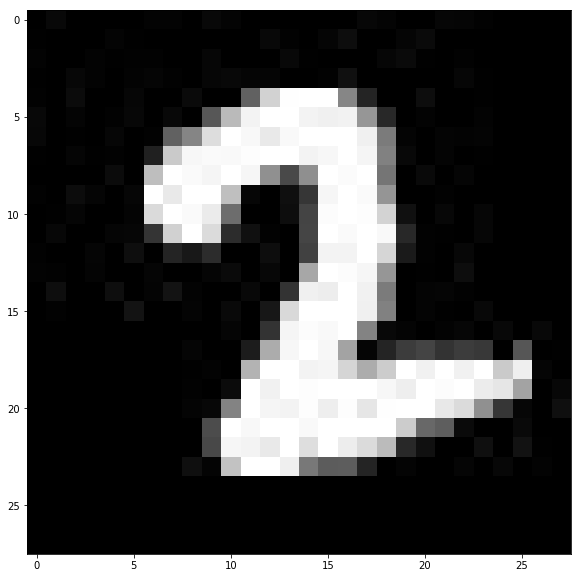

In [12]:
# Import libraries
import glob

# Initialization
num=0
dif=0
total_time=0
correct=0

# Program starting time
overall_start = time.time()

# Load images and perform classification
for i in range (10):
    print 'Current test image: ' + str(i) + '\n'
    for image_path in glob.glob('C:/Users/User/Desktop/LeNet_5/Test_Dataset/'+str(i)+'/*.jpg'):
        print(image_path)
        image = caffe.io.load_image(image_path)
        image = np.mean(image, axis=2)
        net.blobs['data'].data[...] = transformer.preprocess('data', image)
        num = num + 1
        
# perform classification
        start_time = time.time()    # starting time for inference
        net.forward()
        diff = time.time() - start_time    # inference time for one image
        total_time += diff    # cumulative inference time

# obtain the output probabilities
        output_prob = net.blobs['prob'].data[0]

# sort top three predictions from softmax output
        top_inds = output_prob.argsort()[::-1][:3]

# display inference time, probabilities, predicted labels
        print 'Inference Time: ' + str(diff) + ' s'
        print 'Probabilities and labels:', zip(output_prob[top_inds], labels[top_inds])
        print
        
# Current number of correct classified image
        if (i==top_inds[0]):
            correct = correct + 1

accuracy = correct*100.000/num            
print
print 'Number of Images: ',num
print 'Correct Predicted: ',correct
print 'Wrong Predicted: ',num-correct
print
print 'Total Inference Time: ',total_time, 's'
print 'Average Inference Time: ',total_time/num, 's'
print 'Frames per seconds:', num/total_time, 'fps'
print
print 'Final Top 1 Accuracy: ',accuracy,'%'
print 'Total Time: ',time.time()-overall_start, 's'